# データ分析演習 week08 演習課題
- 氏名： 氏名に置き換えてください
- 学生番号： 学生番号に置き換えてください

## はじめに
1. このファイルの名前の(JBxxxxxx)を自分の学生番号にしてください．
2. 上記の氏名と学生番号を忘れずに記入してください．

## 提出方法
- GitHub Desktopを通じてGitHubへ提出
- 締切: **6月25日（木）**

## この演習資料の進め方
1. これまでの復習（特に，pandasとmatplotlib）+ $\alpha$ の内容となっています．　ところどころ`[ここにコードを書く]`と書いていますので，上から実行しながら，コードを修正しセルを完成していってください．教科書の2章も参照してください．
2. 早く終わった人は， report3 に取り組んでください．

## この演習資料の目的
- 実際のデータに対して，これまで習ったpandasの機能を用いることで，各種統計量の確認や年や月といったグループごとの統計量の確認が簡単にできることを知る
- pandasとmatplotlibを組みあわせてデータを可視化することで， いろいろな観点からの可視化が簡単にできることを知る
---

はじめに，本日の演習で使うモジュールをインポートしておきます．以下のセルを実行してください．

In [ ]:
# pandas の読み込み
import pandas as pd

# Matplotlib と Seabornの読み込み
import matplotlib as mpl
import seaborn as sns
sns.set()

# pyplotにはpltの別名で実行できるようにする
import matplotlib.pyplot as plt

# Jupyter Notebook上でグラフを表示させるために必要なマジックコマンド
%matplotlib inline

In [ ]:
pd.set_option("display.precision", 3) # pandasのDataFrameやSeries中の値を表示するときに小数点第3位までの表示にする

In [ ]:
# numpyなどの出力を小数第3位まで表示
%precision 3

# csvファイルをDataFrameとして読み込む

これまでの演習では，DataFrameを作成する際に，データを辞書（dict）としてコード中に記述することでDataFrameの作成を行っていましたが，実際の分析ではそのようにコード中にデータを記述することはあまりません． pandasにはcsvやExcelなどのファイルからデータを読み込んでDataFrameを作成してくれる関数が用意されています． 

今週の演習課題のリポジトリの中に，今回使うデータが`week08data.csv`というファイル名のCSVファイルとして入っています．これを読み込んでみます． csvファイルを読み込みには，`pd.read_csv()`関数を使用します．

In [ ]:
df = pd.read_csv("week08data.csv", parse_dates=[0], index_col=0) # csvファイルを読み込みDataFrameを作成し， df に代入する
df # df の中身を表示する．

`pd.read_csv("week08data.csv", parse_dates=[0], )` は `week08data.csv` をDataFrameとして読み込む，という意味です． `index_col=0` はcsvの0列目をインデックス名として使用する，という意味で，  `parse_dates=[0]` は 0列目のデータを時系列情報として読み込む，という意味です．

これで csv ファイルを読みこむことができました．データ自体の出典は講義資料を参考にしてください． 二人以上の世帯を対象にした，2010年〜2019年の10年間のさまざまな品目における毎月の支出金額（円）に関するデータとなっています．`year`と`month`の列はそれぞれデータの年と月を表します．
- なお，実は`year`や`month`という列を用意する必要はなく，インデックス列の情報を使えば本演習で行っているような特定の年や月ごとに値を集計することはできるのですが，今回は話を単純にするため，年や月を表す列を明示的に加えています． 

`rice`以降の列は各品目を表します． ラベル名を英語に修正しています．英語ともとの日本語のラベル名の対応は下記のようになっています．

In [ ]:
pd.read_excel("label_info.xlsx") # 対応表を表示

たとえば，　`df` の `0`行`rice`列の値`1815`は，2010年1月における，二人以上の世帯の米の支出金額が1,980円である，ということを表しています．

---

さて，ここからは実際にpandasやmatplotlibを使ってデータを分析していきます． ところどころ穴抜けになっていますので，修正しながらセルを実行していってください．

# パート1: pandasでデータを分析する

## 1-1 平均を調べる

まずは，10年間の120ヶ月分全てのデータにおける，各品目の支出金額の平均について計算してみましょう．

たとえば， 米（`rice`）の10年間の支出金額の平均を計算したければ

In [ ]:
[ここにコードを書く] # rice 列の平均を求める

として求められます． 一方， DataFrameでは列を指定せず `df.mean()`とするだけで，全ての量的データに対して平均を求めることができました．

In [ ]:
[ここにコードを書く] #全ての量的データに対して平均を求める

これで各品目の平均支出金額が求められたのですが， `year` や `month` の列についても平均が求められていることが分かります．これは，データの読み込み時に `year` や `month` についても pandasが量的データであると認識しているからです． 

次週の先取りになりますが，現在のDataFrameのインデックスや各列がどのような型として認識されているかを確認するには， `info()`という関数を使います．

In [ ]:
df.info() # 変数 df に入っているDataFrameの情報を表示する 

たとえば ` 0   year         120 non-null    int64  ` という情報は，  `year` の列は `int64`型 のデータ（すなわち，整数のデータ）であり， 欠損値ではない120個のデータがある，ということを表しています． 実際，10年間のデータですので， 10 x 12ヶ月 = 120ヶ月分のデータがあります．

さて， `df.mean()` としてしまうと， `year` や `month` まで平均を求められてしまうので， 各品目だけに絞って平均を求めてみます．

In [ ]:
df[['rice',  'bread',  'noodle',  'fish_faw',  'fish_salt',  'fish_processed',  'beef',  'pork',  'chiken',  
 'ham',  'sausage',  'bacon',  'milk',  'dairy',  'egg',  'cabbage',  'spinach',  'chinese_cabbage',  
 'green_onion',  'broccoli',  'bean_sprouts',  'potato',  'radish',  'carrot',  'onion',  'bambooshot', 
 'eggplant',  'tomato',  'green_pepper',  'apple',  'mikan',  'orange',  'pear',  'yokan',  'manju',  'castella',  
 'cake',  'jelly',  'pudding',  'senbei',  'biscuit',  'snack',  'candy',  'chocolate',  'icecream']].mean() # 品目だけ平均を計算する

なお，  year と month を省いて平均を求める別の方法としては `drop()` を使う方法もあります． `df.drop(["year", "month"], axis=1)` とすると， `year`列と`month`列を削除したDataFrameを作ることができますので，そのDataFrameに対して全ての量的データに対して平均を求めてやれば，先ほどと同じ結果になります．

In [ ]:
df.drop(["year", "month"], axis=1).mean() # year列とmonth列を削除したDataFrameに対して各列の平均を求める

さて，　

の用に，毎回こんなに大量のカラムをコードとして書くのは面倒なので，品目を表した配列を定義しておきました．

In [ ]:
products = ['rice',  'bread',  'noodle',  'fish_faw',  'fish_salt',  'fish_processed',  'beef',  'pork',  'chiken',  
 'ham',  'sausage',  'bacon',  'milk',  'dairy',  'egg',  'cabbage',  'spinach',  'chinese_cabbage',  
 'green_onion',  'broccoli',  'bean_sprouts',  'potato',  'radish',  'carrot',  'onion',  'bambooshot', 
 'eggplant',  'tomato',  'green_pepper',  'apple',  'mikan',  'orange',  'pear',  'yokan',  'manju',  'castella',  
 'cake',  'jelly',  'pudding',  'senbei',  'biscuit',  'snack',  'candy',  'chocolate',  'icecream']

この変数を用いれば，全ての品目の平均を求めるのは下記のコードで書けます．

In [ ]:
df[products].mean() # 品目についてだけ平均を計算する

（参考） なお，  配列 `products` を定義するのに今は全てのラベル名を直接コードに書きましたが，本来はそのようにコード中に，今後変わるかもしれないデータを記載するのは好ましくありません．例えば，データに新しく品目を追加したら，上記の `products`の定義のコードを修正する必要がでてしまいます．

より良い方法として，下記のように， ラベル一覧を記したファイル`label_info.xlsx`から全ラベル名を読みこむことでも `products`　を作ることができます．

In [ ]:
df_labels = pd.read_excel("label_info.xlsx") # ラベルの対応表を読み込む
products = df_labels["English"].values.tolist() # English列の全文字列を配列として products に代入する
products # products の中身を表示

## 1-2 平均以外の統計量を調べる

これも次週の先取りになりますが， 平均以外の統計量（最大値，中央値，標準偏差など・・・）を手軽に知る方法として， `describe()`という関数があります．

In [ ]:
df[products].describe()

簡単に項目をかいつまんで説明すると，
- **count**: データの個数
- **mean**: 平均
- **std**: （不偏）標準偏差 （$n-1$で割る方の分散の平方根）
- **25%**: 第1四分位数
- **50%**: 中央値

です． 各変数のいろいろな統計量を知りたいときに便利な関数です．

たとえば， 米（`rice`）とパン（`bread`）と麺類（`noodle`）の各種統計量だけ知りたければ，

In [ ]:
[ここにコードを書く]

とすれば求まりますね． 10年間の各月の支出金額の平均をみると，この3つのなかで最も支出金額が多い品目はパンであることが分かりますね．

##  1-3 いろいろな条件で支出金額を調べる

### 1-3-1 特定の年（2010年）における各品目の毎月の支出金額の平均を計算する

week06（教科書ch.2.4）で見たように，pandasでは特定の条件にマッチした行だけを抽出することが簡単にできます．

先ほどは10年間全てのデータに対して平均を求めましたが，ここでは，2010年のデータだけを対象に平均を見てみましょう． まず， 変数 `df` から 2010年のデータだけを抽出し， `df_2010`という変数に代入してみます．  `year`列にデータの年が入っていますので，この列に対して条件を書けば良いですね．教科書 ch2.4.5も参照してください．

In [ ]:
df_2010 = [ここにコードを書く] # yearが2010の行だけ抽出し df_2010 に格納する
df_2010 # df_2010 の中身を表示

2010年のデータだけを取得できましたので，あとはこのデータに対して平均を求めるだけですね． やはり `year` と `month` の列まで含まれてしまってますので， 変数 `products`　を使って列を絞り込んでから平均を求めましょう．

In [ ]:
[ここにコードを書く] # 全ての品目に対して2010年の平均を求める

正しく計算できていれば， 米の2010年の月ごとの支出金額の平均は2384.250 円，パンの支出金額は2348.000 円ということが分かります．

### 1-3-2 年ごとの支出金額の推移を調べる
さて，いまは2010年の平均を求めましたが，それぞれの年ごとの平均を求めてみましょう．pandasの便利な機能の1つに，`groupby()`によるグループ化がありました．これを用いれば，年や月ごとの平均や合計などを求めることもできます．

ここでは， 各年ごとの総支出金額を求め，その推移を見ることにしましょう．すなわち， 米の2010年の総支出金額とは， 2010年1月・・・2010年12月までの支出金額を合計したものになります．

平均を求めるのは`mean()`ですが，ここで求めたいのは平均ではなく合計です．合計を求めるのは `sum()`を用います．  groupby()とsum()を用いて，全品目について，各年の支出金額の合計を求めてみましょう． `groupby()`については教科書 ch2.4.7も参照してください．

In [ ]:
df_by_year = [ここにコードを書く] # 各年ごとに全ての品目で総支出金額を計算し， df_by_yearに代入せよ
df_by_year # df_by_year を表示

正しく求められていれば，こんな感じの出力になると思います．　（始めの数行数列だけ表示しています）

さて，これで全ての品目の毎年の総支出金額を見ることができました．たとえば， 米（`rice`）の値動きだけに着目すると

In [ ]:
[ここにコードを書く] # rice列だけ表示する

としてやれば良いですね．  米の支出金額が2014年と2015年あたりに減っている，ということがこのデータから分かります．すぐ後でこのようなデータを可視化してみます．

### 1-3-2 月ごとの10年間の平均を求める

先ほどは年ごとの総支出金額を求めました．今度は月ごとの10年間の平均について見てみましょう．ここでの月ごとの10年間の平均とは，米の1月支出金額の平均であれば，
- 2010年1月の支出金額，2011年1月の支出金額，$\cdots$, 2019年1月の支出金額 

について平均をとる，という意味です． このようにデータを集約することで，支出金額の月単位でのパターンが見えるようになります．

さて， 全ての品目に対して，月ごとの10年間の平均を求めてみます． 先ほどとは違い平均なので， `sum()`ではなく`mean()`を用いれば良いですね．

In [ ]:
df_by_month = [ここにコードを書く] # 全ての品目について月ごとの平均を求め df_by_monthに代入する
df_by_month # df_by_monthの中身を表示する

では， `df_by_month` から チョコレート（`chocolate`）とアイスクリーム・シャーベット（`icecream`）の列だけ抽出して表示してみましょう．

In [ ]:
[ここにコードを書く] # df_by_monthのchocolateとicecreamの列だけ抽出する

これで，チョコレートとアイスクリーム・シャーベットの各月の支出金額の平均が分かりましたね．　チョコレートの支出金額が最も多くなる月は2月で1,271.0円， アイスクリームについては8月で1379.6円，ということが分かります．

---

# パート2: matplotlib（とpandas）を用いた可視化

さて， データ分析では数値を眺めるだけでなく可視化した方が分かりやすいことが多々あります． 

## 2-1 支出金額のヒストグラムを見る

まずは，ヒストグラムについて見てみましょう．
ここでは，米の毎月の支出金額のヒストグラムを見てみます．　ビンの数は10としてみましょう．

In [ ]:
plt.figure(figsize=(20,6))
plt.hist(df["rice"], bins=10)
plt.grid(True)

これでもなんとなく分布は分かりますが， ヒストグラムに用いる階級幅（`hist()`関数における`bins`）を自分で設定した方が分かりやすいこともあります． matplotlibのデフォルトの`hist()`関数はbinsに値の配列を入れることで，自分で階級幅を定義することもできますので，ここでは自分で階級幅を設定してみましょう． まず， そもそも米の支出金額の分布がどのようになっているのかを`describe()`で確認してみます．

In [ ]:
df["rice"].describe()

最小値が1,349円，最大値が3,859円でしたので，250円ずつくらいで区切ってみます．

In [ ]:
bins = [1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000] 
plt.figure(figsize=(20,6))
plt.hist(df["rice"], bins=bins)
plt.show()

1,750円以上2,000円未満の範囲に入る月が最も多いことが分かりますね．

## 2-2 米とパンの10年間の支出金額の推移を見てみる

さて，次に支出金額が10年間でどのように変わっていったのかをみてみましょう．ここでは，米（`rice`），パン（`bread`），麺類（`noodle`）の主食系に絞って見てみましょう．

先ほどと同様にして，年ごとの総支出金額をこの3つの品目について求めてみましょう．

In [ ]:
df_carb = df.groupby("year")[["rice", "bread", "noodle"]].sum()
df_carb # df_carb を表示． ちなみに， carb は炭水化物(carbohydrate)の略

このデータを折れ線グラフで表示してみましょう． 前回同様，matplotlibの`plot()`を用います．

まずは米の支出金額の推移を見てみます． `plot()`を使えば良いですね． 教科書 ch.2.5.2も参照してください．

In [1]:
plt.figure(figsize=(20,6))
plt.plot(df_carb["rice"], label="rice") # 米の支出金額の折れ線グラフを書く ．ラベル名はriceとせよ．
plt.xlabel("year") # x軸の座標名を year とする
plt.ylabel("Amount (yen)") # y軸の座標名を Amount (yen) とする
plt.xticks(df_carb.index) # x軸の各目盛りに 2010, 2011, 2012... と書く
plt.legend() # 凡例を表示
plt.grid(True)

NameError: name 'plt' is not defined

米だけでなくパンと麺類のグラフも重ねて書いてみましょう．

In [ ]:
plt.figure(figsize=(20,6))
[ここにコードを書く] # 米の支出金額の折れ線グラフを書く ．ラベル名はriceとせよ．
[ここにコードを書く] # パンの支出金額のグラフを書く．ラベル名はbreadとせよ．
[ここにコードを書く] # 麺類の支出金額のグラフを書く．ラベル名はnoodleとせよ．
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.xticks(df_carb.index)
plt.legend()
plt.grid(True)

さて，いま作成した2つの折れ線グラフですが，よく見るとY軸の最小値は0ではないですね．皆さんは気づきましたでしょうか． matplotlibは入力データの範囲に合わせてX軸やY軸の最小値と最大値を設定してくれます．基本的には便利な機能なのですが， 最小値を0に合わせないとデータの解釈を間違える可能性もあります． X軸やY軸の最小値や最大値を設定するには，`xlim()`や`ylim()`を使います．たとえば， Y軸の範囲を [0, 40000] にするには `plt.ylim(0, 40000)` のようにします． 以下のコードを実行してください．

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_carb["rice"], label="rice") # 米の支出金額の折れ線グラフを書く 
plt.plot(df_carb["bread"], label="bread") # パンの支出金額のグラフを書く
plt.plot(df_carb["noodle"], label="noodle") # 麺類の支出金額のグラフを書く
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.ylim(0, 40000) # Y軸の範囲を 0　から 40,000 にする
plt.xticks(df_carb.index)
plt.legend()
plt.grid(True)

`plt.ylim(0, 40000)` のようにコードに範囲を直接設定してしまうと，データを変えるとまたコードを修正する必要があります． `df_curb.max()` で各品目の最大値がとれ，更に `df_curb.max().max()` とすることで， 各列の最大値の最大値を求めることができます．

In [ ]:
df_carb.max() # 各列の最大値を求める

In [ ]:
df_carb.max().max() # 各列の最大値の最大値をとる（つまり，全要素の最大値）

これを用いると， データから自動的にY軸の最大値を設定できますね．

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_carb["rice"], label="rice") # 米の支出金額の折れ線グラフを書く 
plt.plot(df_carb["bread"], label="bread") # パンの支出金額のグラフを書く
plt.plot(df_carb["noodle"], label="noodle") # 麺類の支出金額のグラフを書く
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.ylim(0, df_carb.max().max()* 1.1) # Y軸の範囲を 0　からデータの最大値の1.1倍にする
plt.xticks(df_carb.index)
plt.legend()
plt.grid(True)

さて，グラフを見ると，ここ10年でパンの支出金額は増加している一方，米の支出金額は減少していることがわかりますね． 日本人の米離れという話をよく聞きますが，このように支出金額のデータからもその傾向が読み取れます． また，麺類については10年間での変化はあまりなさそうです．
 - 2014年と2015年の米の支出金額の落ち込みの原因はなんなのでしょうか？考えてみると面白そうですね．

なお，いまはこのグラフを書くために matplotlibの`plot()`関数を利用しましたが， pandasのDataFrameにも`plot()`関数があり，そちらを利用することもできます． 今一度 df_carb の中身を表示してみます．

In [ ]:
df_carb

pandasのDataFrameの`plot()`関数を呼ぶのは以下の様にします．

In [ ]:
df_carb.plot(figsize=(20,6)) # figsize=(20,6) はなくても描画できる． いままでと同様グラフの大きさの設定をするための引数

何も設定していなくとも， 各系列の凡例（`rice`，`bread`，`noodle`）が付いていたり，x軸に座標名（`year`）が設定されているのが分かるかと思います．pandasの`plot()`関数も中身はmatplotlibを使っています．pandasの方の`plot()`関数を使うと，色々と必要そうな初期設定をDataFrameの中身に応じてデフォルトでやってくれるので，matplotlibを直接使うよりもコードが簡潔に書けます
- このような感じで，pandasやmatplotlibを使った分析は，同じことをするための方法がさまざまあります．自分にとって分かりやすい方法で書くことができれば十分です．この演習資料では，教科書に合わせて，できる限りmatplotlibを直接用いるコードを書きます．

 いま表示した図を少し見た目を整形して，ファイルに保存してみます． 見た目の整形に関しては参考程度にみておけば十分です．重要な関数としては`savefig()`で，  `savefig(ファイル名) ` で画像をマシン上に保存することができます． 画像の種類は拡張子（`.png`，`.pdf`，`.jpg`など）を変えると自動的にその拡張子の形式で保存してくれます．

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_carb["rice"], "o-", label="rice") #oで点を○で表示する． - で点間を直線で結ぶ
plt.plot(df_carb["bread"], "o-", label="bread")
plt.plot(df_carb["noodle"], "o-", label="noodle")
plt.xlabel("year", fontsize=20) # fontsizeで文字の大きさを設定する
plt.ylabel("Amount (yen)", fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(df_carb.index, fontsize=14, rotation=20) #ラベルを全て表示する．ラベルを20度傾けて表示してみる
plt.ylim(0, df_carb.max().max()* 1.1) # Y軸の範囲を 0　からデータの最大値の1.1倍にする
plt.title("10 Years Changes in Spending Amounts (yen) ", fontsize=20) # 図のタイトル
plt.legend(fontsize=20)
plt.savefig("10years.png") # PNG形式で画像を10year.pngというファイル名で保存する
plt.grid(True)

上記セルの実行後，みなさんの手元のPCにある演習課題のリポジトリのフォルダに `10year.png`というファイルが作成されているはずです．

補足:  今回は1つのグラフに複数の折れ線を重ねて描画しました． `df_carb`のそれぞれの品目ごとに1つのグラフを書く方法として， for 文でぐるぐる回す方法もあります． `plt.show()` は　図を明示的に表示するためのコマンドです（今まではJupyerがセルの最後にある `plt.grid(True)` の結果を解釈して勝手に図を表示してくれていた）

In [ ]:
carbs = ["rice", "bread", "noodle"]
for item in carbs:
    plt.plot(df_carb[item], label=item)
    plt.xlabel("year")
    plt.ylabel("Amount (yen)")
    plt.ylim(0, df_carb[item].max() * 1.1)
    plt.xticks(df_carb.index)
    plt.legend()
    plt.grid(True)
    plt.show() #明示的に図を描画する

## 2-3 品目間の支出金額の相関を確認する

最後に，散布図についても使ってみましょう． ここでは キャンデーとアイスクリーム・シャーベットの毎月の支出金額の散布図を作成してみます．直感的には，アイスクリームは暑い時期の方が売れますし，キャンデーは暑い時期はあまり売れなさそうで，この2つの品目の毎月の支出金額には`負の相関`がありそうです． 実際に散布図を描いて確認してみましょう．

変数 `df` に何が入っているのかを今一度表示しておきます．

In [ ]:
df

それでは，この　`df`　を使って，キャンデーとアイスクリームの毎月の支出金額の散布図を作成しましょう．最後はセルを全部空にしますので，各自で考えて散布図を書いてみましょう．そのとき，散布図が以下の仕様を満たすようにしてください．

- x軸をキャンデーの毎月の支出金額とせよ
- y軸をアイスクリームの毎月の支出金額とせよ
- x軸の座標名を `candy` とせよ
- y軸の座標名を `icecream` とせよ
- 作成した図を `scatter.png`　というファイル名で演習課題のリポジトリのフォルダに保存せよ．

ヒント: 散布図も `plt.plot()` を使って書けるのでしたね．

In [ ]:
[このセルにコードをいろいろ書く]

細部の見え方は違うかもしれませんが，下記の様な図が表示され，それが`scatter.png`というファイル名で演習課題のリポジトリのフォルダに作成されていればOKです．

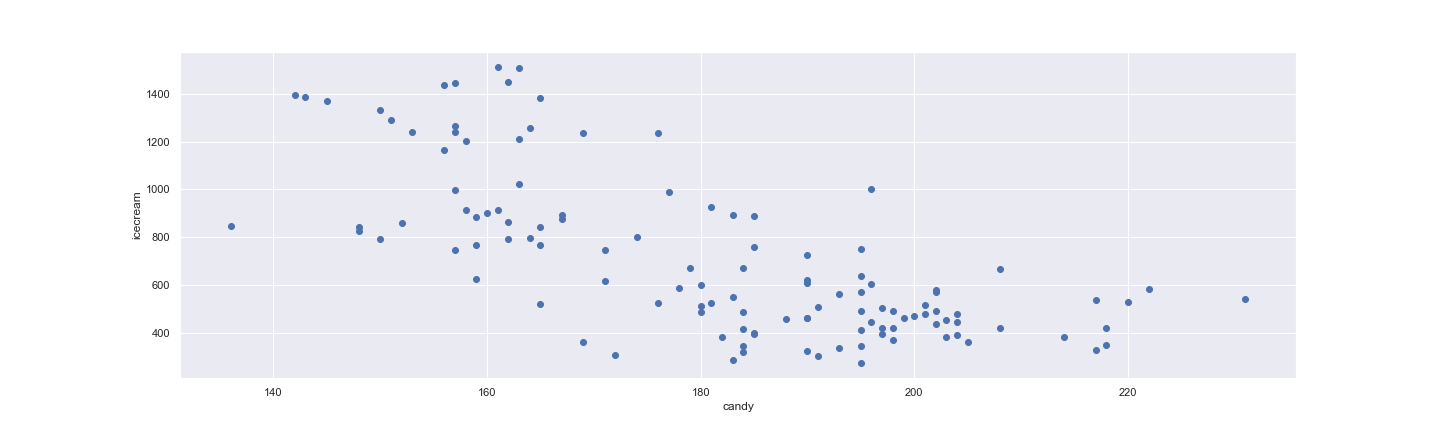

やはり負の相関が散布図から見えますね．念のための相関係数についても計算してみると，

In [ ]:
import scipy as sp
sp.stats.pearsonr(df["candy"], df["icecream"])[0] # キャンデーとアイスクリームの支出金額のピアソンの積率相関係数を計算する

となり， 負となっていることが分かります．

これで今週の演習課題は終わりです． 実際のデータでpandasやmatplotlibを用いてみました． こうしたライブラリを使って分析する雰囲気が分かってもらえれば十分です．レポートその3では今回のデータに対して各自でいろいろと分析してもらいます． この演習資料の内容や教科書を何度も見返すと思いますが，ちょっとづつ慣れていきましょう．